In [9]:
import numpy as np
import numpy.linalg as linalg
import pandas
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize

In [18]:
# Paramètres initiaux
beta_b = 0.1
gamma_b = 1/7
mu_b = 0.143

beta_m = 0.02
mu_m = 1/28

beta_h = 1
sigma_h = 1/4
gamma_h = 1/5

I_b0 = 8179
R_b0 = 2300
D_b0 = 1612
S_b0 = 34000 - I_b0 - D_b0 - R_b0

S_m0 = 7100
I_m0 = 1900

E_h0 = 270
I_h0 = 118
R_h0 = 368
S_h0 = 4500-E_h0-I_h0-R_h0

#S_b I_b R_b D_b S_m I_m S_h E_h I_h R_h
initial_conditions = [S_b0, I_b0, R_b0, D_b0, S_m0, I_m0, S_h0, E_h0, I_h0, R_h0]

In [19]:
# dY = model_class(Y,t,paramètres)
def model(Y, t, beta_b, gamma_b, mu_b, beta_m, mu_m, beta_h, sigma_h, gamma_h):
    S_b, I_b, R_b, D_b, S_m, I_m, S_h, E_h, I_h, R_h = Y
        
    dS_b = -beta_b*S_b*I_m/(S_m+I_m)
    dI_b = beta_b*S_b*I_m/(S_m+I_m) - mu_b*I_b - gamma_b*I_b
    dR_b = gamma_b*I_b
    dD_b = mu_b*I_b
    
    dS_m = -beta_m*S_m*I_b/(S_b+I_b+R_b)
    dI_m = beta_m*S_m*I_b/(S_b+I_b+R_b) - mu_m*I_m
    
    dS_h = -beta_h*S_h*I_m/(S_m+I_m)
    dE_h = beta_h*S_h*I_m/(S_m+I_m) - sigma_h*E_h
    dI_h = sigma_h*E_h - gamma_h*I_h
    dR_h = gamma_h*I_h

    return [dS_b, dI_b, dR_b, dD_b, dS_m, dI_m, dS_h, dE_h, dI_h, dR_h]

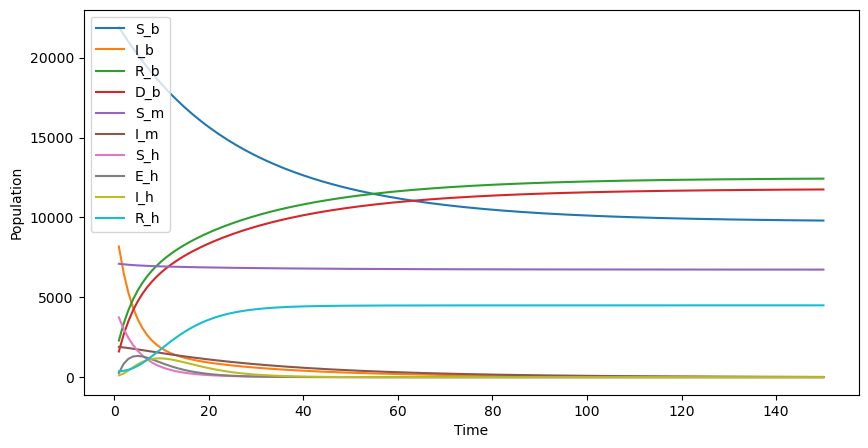

In [20]:
# Initialisation
t_array = np.linspace(1, 150, 150)

model = integrate.odeint(model, initial_conditions, t_array, args=(beta_b, gamma_b, mu_b, beta_m, mu_m, beta_h, sigma_h, gamma_h))

# Tracer des résultats
plt.figure(figsize=(10,5))
plt.plot(t_array, model[:, 0], label='S_b')
plt.plot(t_array, model[:, 1], label='I_b')
plt.plot(t_array, model[:, 2], label='R_b')
plt.plot(t_array, model[:, 3], label='D_b')
plt.plot(t_array, model[:, 4], label='S_m')
plt.plot(t_array, model[:, 5], label='I_m')
plt.plot(t_array, model[:, 6], label='S_h')
plt.plot(t_array, model[:, 7], label='E_h')
plt.plot(t_array, model[:, 8], label='I_h')
plt.plot(t_array, model[:, 9], label='R_h')

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()